In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plot
import matplotlib.image as mpimg

# Stim Classification preprocessing
## Read all expiriments data and concatenate to one dataFrame

In [204]:
file_name = 'all_subjects_data_bmem_short_BDM'
df_bmem_short_BDM = pd.read_pickle('../parsing/' + file_name)
file_name = 'scale_ranking_bmm_short_data'
df_scale_ranking_bmm_short = pd.read_pickle('../parsing/' + file_name)

In [205]:
#merge the to datasets to one
df = pd.concat([df_bmem_short_BDM,df_scale_ranking_bmm_short])


## Get only relevant columns

In [206]:
#get only relevant columns
df = df[['subjectID','trialNum','stimType','stimId','timeStamp','X_axis','Y_axis']]

## Tiding the data

In [207]:
#Remove Nan
tidyDf = df.dropna(how='any')

In [208]:
#remove strings " . ", "EBLINK", FIX", "SACC" data rows
tidyDf = tidyDf[(tidyDf['timeStamp'].str.contains('EFIX', na=False) == False) &
                        (tidyDf['timeStamp'].str.contains('EBLINK', na=False) == False) &
          (tidyDf['timeStamp'].str.contains('ESACC', na=False) == False) &
               (tidyDf['timeStamp'].str.contains(' . ', na=False) == False)]
tidyDf = tidyDf.reset_index()

In [209]:
#remove data rows of stimId '6', so we use only 'faces' data and not using 'familiar faces' data
#this is for convenience, so the data will distributed equally
tidyDf = tidyDf[tidyDf['stimId'] != 6]

In [210]:
# Change X, Y and timeStamp data from String to Numeric
tidyDf.X_axis = pd.to_numeric(tidyDf.X_axis, errors='coerce')
tidyDf.Y_axis = pd.to_numeric(tidyDf.Y_axis, errors='coerce')
tidyDf.timeStamp = pd.to_numeric(tidyDf.timeStamp, errors='coerce')

In [168]:
#add 'sampleId' field for each uniqe sample
tidyDf['sampleId'] = tidyDf['subjectID'].astype(str) + '_' +tidyDf['trialNum'].astype(str) + '_' + tidyDf['stimId'].astype(str)

In [169]:
#set stimId '6' to be '2' so we'll have only 3 classes and update the sampleId to be unique

#indexes = tidyDf[tidyDf['stimId'] == 6].index
#tidyDf.loc[indexes,'subjectID'] = tidyDf.loc[indexes,'subjectID'] + '_6'
#tidyDf.loc[indexes,'stimId'] = 2

In [191]:
#get only relevant columns
finalDFforStimClassification = tidyDf[['stimType','stimId','sampleId','X_axis','Y_axis']]

## Plot the dist of data points to make sure we use the majority of data points

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2e1805898>]], dtype=object)

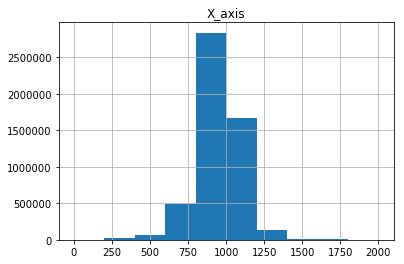

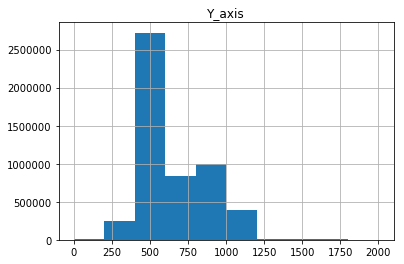

In [192]:
#look for the x,y data points distrebution
finalDFforStimClassification.hist(column='X_axis',range=[0, 2000])
finalDFforStimClassification.hist(column='Y_axis',range=[0, 2000])

## Adjust the x,y data points to be within the image frame and in scale of 0-400, rounded 

In [193]:
finalDFforStimClassification = finalDFforStimClassification[(finalDFforStimClassification['X_axis'] > 760) & 
                                                            (finalDFforStimClassification['X_axis'] < 1160) &
                                                            (finalDFforStimClassification['Y_axis'] > 340) &
                                                            (finalDFforStimClassification['Y_axis'] < 740)]

finalDFforStimClassification.X_axis = finalDFforStimClassification.X_axis - 760
finalDFforStimClassification.Y_axis = finalDFforStimClassification.Y_axis - 340
finalDFforStimClassification.X_axis = finalDFforStimClassification.X_axis.round()
finalDFforStimClassification.Y_axis = finalDFforStimClassification.Y_axis.round()

## Plot the x,y data points by stim type (For motivation)

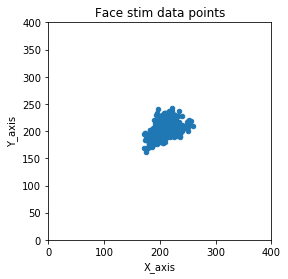

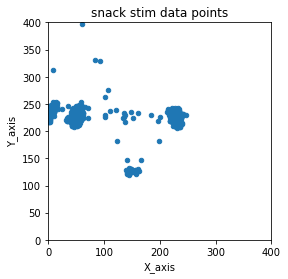

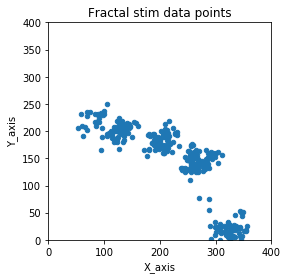

In [212]:
faceStim = finalDFforStimClassification[finalDFforStimClassification['sampleId'] == 'bmem_short_101_3_2']
snackStim = finalDFforStimClassification[finalDFforStimClassification['sampleId'] == 'bmem_short_101_1_1']
fractalStim = finalDFforStimClassification[finalDFforStimClassification['sampleId'] == 'bmem_short_101_10_3']

faceStim.plot.scatter(x='X_axis', y='Y_axis', figsize=(4,4), ylim = (0, 400), xlim = (0, 400), 
                    title="Face stim data points")
snackStim.plot.scatter(x='X_axis', y='Y_axis', figsize=(4,4), ylim = (0, 400), xlim = (0, 400), 
                    title="snack stim data points")
fractalStim.plot.scatter(x='X_axis', y='Y_axis', figsize=(4,4), ylim = (0, 400), xlim = (0, 400), 
                    title="Fractal stim data points")

## Check and compare the data among the 3 classes

In [195]:
#check the samples distrebution among the labels
grouped = finalDFforStimClassification.groupby(['stimId','sampleId']).X_axis.count().reset_index()
grouped.groupby(['stimId']).sampleId.count()

stimId
1    2198
2    1830
3    1831
Name: sampleId, dtype: int64

In [196]:
#remove some of the '1' label data where the data points count is below 200
sampelsId = grouped[(grouped['stimId'] == 1) & (grouped['X_axis'] < 200)].sampleId
finalDFforStimClassification = finalDFforStimClassification[~finalDFforStimClassification.sampleId.isin(sampelsId)]

In [218]:
#check again if the samples are disributed equely
grouped2 = finalDFforStimClassification.groupby(['stimId','sampleId']).X_axis.count().reset_index()
grouped2.groupby(['stimId']).sampleId.count()

stimId
1    1835
2    1830
3    1831
Name: sampleId, dtype: int64

## Final data tiding

In [219]:
#reset index and convert data points to integer
finalDFforStimClassification = finalDFforStimClassification.reset_index()
finalDFforStimClassification.drop('index', axis=1, inplace=True)
finalDFforStimClassification.X_axis = finalDFforStimClassification.X_axis.astype(int)
finalDFforStimClassification.Y_axis = finalDFforStimClassification.Y_axis.astype(int)

## Save the final dataFrame

In [221]:
finalDFforStimClassification.to_pickle('final_DF_for_stim_classification')